## Cululative Returns
## Goals:
##       -morecomplicated Pandas
##       -Refactoring into a functions
##       -Explore source
##       -Creating new columns with '.assign
##       -Illustrate lambda
##
## Cumulative Returns is the amount that investment has gained or lost over time:

#  (currentprice - originalprice) / originalprice


In [2]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] # using a list comprehension to extract the first entry for each tuple in 
                                        # the multi-index from .columns ^above^
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

import yfinance as yf
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] 
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()


# TO define apple data
aapl = (raw
        .iloc[:,::2]
        .pipe(fix_cols))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

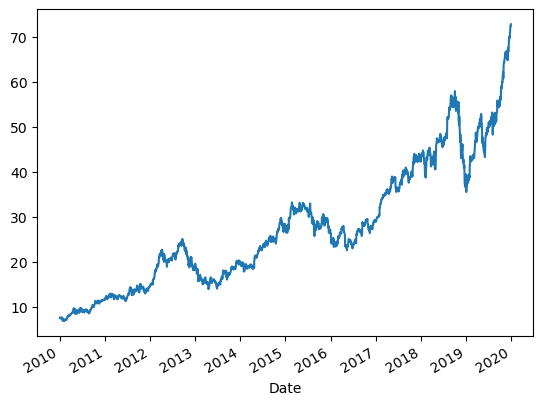

In [3]:
(aapl
 .Close
 .plot()
)

<AxesSubplot:xlabel='Date'>

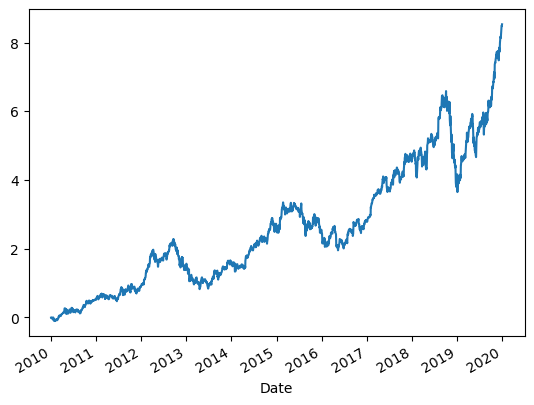

In [8]:
(aapl
 .Close
 .sub(aapl.Close[0]) # subtract the 1st value from Close
 .div(aapl.Close[0]) # dividing by the first value
 .plot()
)

# 8.5% return over the decade of data

<AxesSubplot:xlabel='Date'>

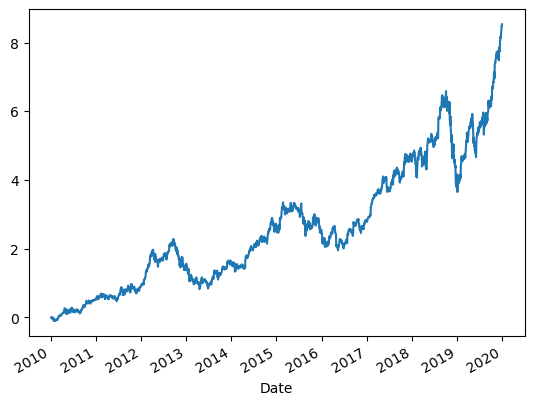

In [9]:
# Alternate Calculation

(aapl
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

In [10]:
aapl.cumprod?

Signature: aapl.cumprod(axis=None, skipna=True, *args, **kwargs)
Docstring:
Return cumulative product over a DataFrame or Series axis.

Returns a DataFrame or Series of the same size containing the cumulative
product.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The index or the name of the axis. 0 is equivalent to None or 'index'.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
*args, **kwargs
    Additional keywords have no effect but might be accepted for
    compatibility with NumPy.

Returns
-------
Series or DataFrame
    Return cumulative product of Series or DataFrame.

See Also
--------
core.window.Expanding.prod : Similar functionality
    but ignores ``NaN`` values.
DataFrame.prod : Return the product over
    DataFrame axis.
DataFrame.cummax : Return cumulative maximum over DataFrame axis.
DataFrame.cummin : Return cumulative minimum over DataFrame axis.
DataFrame.cumsum : Retur

In [12]:
pd.core.generic.NDFrame.cumprod??

Signature:
pd.core.generic.NDFrame.cumprod(
    self,
    axis: 'Axis | None' = None,
    skipna: 'bool_t' = True,
    *args,
    **kwargs,
)
Docstring: <no docstring>
Source:   
    def cumprod(self, axis: Axis | None = None, skipna: bool_t = True, *args, **kwargs):
        return self._accum_func("cumprod", np.cumprod, axis, skipna, *args, **kwargs)
File:      c:\users\michael\anaconda3\lib\site-packages\pandas\core\generic.py
Type:      function


In [13]:
np.cumprod?

Signature: np.cumprod(a, axis=None, dtype=None, out=None)
Docstring:
Return the cumulative product of elements along a given axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    Axis along which the cumulative product is computed.  By default
    the input is flattened.
dtype : dtype, optional
    Type of the returned array, as well as of the accumulator in which
    the elements are multiplied.  If *dtype* is not specified, it
    defaults to the dtype of `a`, unless `a` has an integer dtype with
    a precision less than that of the default platform integer.  In
    that case, the default platform integer is used instead.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output
    but the type of the resulting values will be cast if necessary.

Returns
-------
cumprod : ndarray
    A new array holding the result is returned unless `out` is
    specified

## Create a function for calculating

<AxesSubplot:xlabel='Date'>

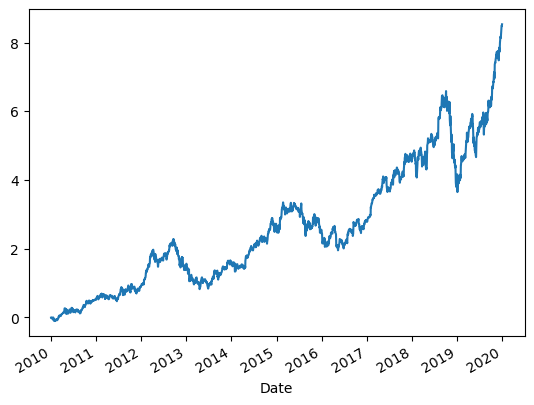

In [15]:
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(aapl
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

## Lambda is an anonymous function

In [16]:
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [17]:
(lambda df: get_returns(df))(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

## Create a new column

In [18]:
(aapl
 .assign(cum_returns=lambda df: calc_cum_returns(df, 'Close')) # to add cumulative returns 
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04,6.505278,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.412873,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.401020,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23,69.451065,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.896339,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


## Returns Using Matplotlib

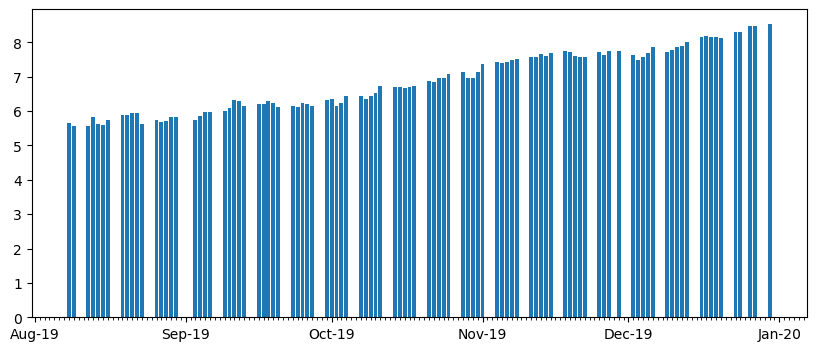

In [24]:
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fix, ax = plt.subplots(figsize=(10,4))
_ = (aapl
    .pipe(calc_cum_returns, 'Close')
    .iloc[-100:]
    .pipe(my_bar, ax)
    )
